# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [1]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2023-02-27 16:59:34--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M   172MB/s    in 0.2s    

2023-02-27 16:59:34 (172 MB/s) - ‘train.csv’ saved [29470338/29470338]



## Inspect Data

In [2]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [3]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [4]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
# TODO implement a new column text which contains the lowercased title and lead (concatenated with space)
df["text"] = df['title'] + ' ' + df['lead']

In [6]:
df.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."


In [7]:
# TODO print the number of documents for each label
print(df['label'].value_counts())

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64


## Document Length

<AxesSubplot:xlabel='label'>

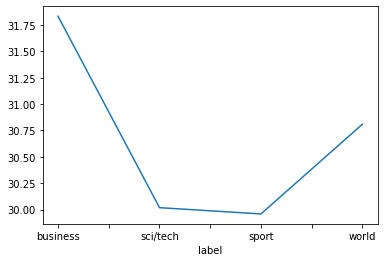

In [17]:
# TODO create a new column with the number of non-stop words in each text

import spacy

nlp = spacy.load('en_core_web_sm')

def count_nonstop_words(text):
    doc = nlp(text)
    nonstop_tokens = [token for token in doc if not token.is_stop]
    return len(nonstop_tokens)

df['nonstop_wordcount'] = df['text'].apply(count_nonstop_words)

# TODO plot the average number of non-stop words per label 

df.groupby('label')['nonstop_wordcount'].mean().plot()

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") and numbers appear in the different classes in our data

In [10]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern for keyword
    x = keyword
    pattern = re.compile(x)
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text

        #findall returns list with all occurences
        num_occurrences = len(pattern.findall(x))
        return num_occurrences

    # Now, we can print how often a keyword appears in the data
    print (df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword)


        #TODO print how often the keyword appears in this class

        for name, group in df.groupby('label'):
            #print(group.head())
            if not label == name:
                continue

            else:
                print(group['text'].apply(count_keyword_frequencies).sum())
          
        #print(df['text'].groupby('label').apply(count_keyword_frequencies).sum())
        #print(df.groupby('label').apply(count_keyword_frequencies).sum())

    print ("*" * 100)

6955
label: business , keyword: play
297
label: sci/tech , keyword: play
1459
label: sport , keyword: play
4851
label: world , keyword: play
348
****************************************************************************************************
1290
label: business , keyword: tax
998
label: sci/tech , keyword: tax
87
label: sport , keyword: tax
26
label: world , keyword: tax
179
****************************************************************************************************
0
label: business , keyword: blackberry
0
label: sci/tech , keyword: blackberry
0
label: sport , keyword: blackberry
0
label: world , keyword: blackberry
0
****************************************************************************************************
3
label: business , keyword: israel
0
label: sci/tech , keyword: israel
0
label: sport , keyword: israel
0
label: world , keyword: israel
3
****************************************************************************************************


As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

<AxesSubplot:xlabel='label'>

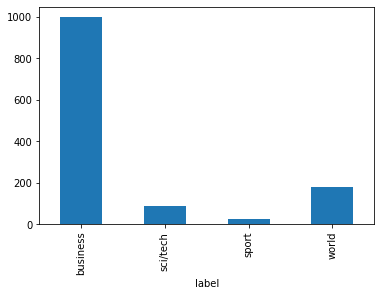

In [11]:
import matplotlib.pyplot as plt

keyword = "tax"

# '\w*' matches any instance of string 'tax' followed by zero or more word characters
pattern = re.compile(f'{keyword}\w*')

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    return len(pattern.findall(x))

df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset

df.groupby('label')['counts'].sum().plot(kind='bar')

In [12]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

65280

In [13]:
!open homework_01.html

NotImplementedError: ignored